# 二分类信息熵

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entropy(p):
    return -(p*np.log2(p)+(1-p)*np.log2(1-p))

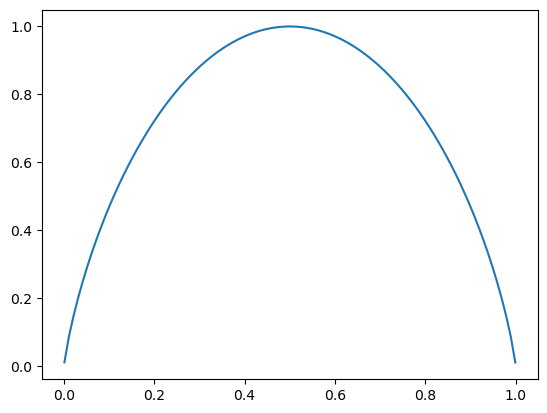

In [3]:
plot_x=np.linspace(0.001,0.999,100)
plt.plot(plot_x,entropy(plot_x))
plt.show()

# 数据集

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data[:,1:3]
y=iris.target

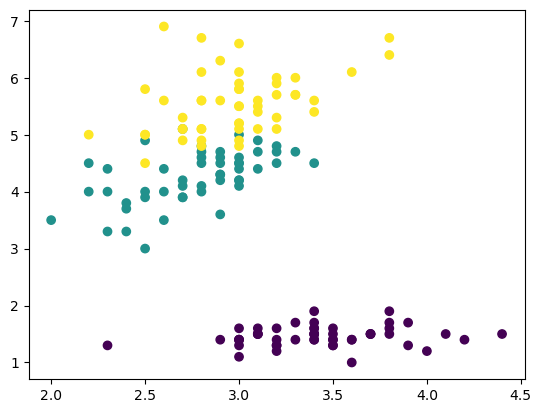

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# sklearn中的决策树

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf=DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [8]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max=X[:,0].min()-1,X[:,0].max()+1
    axis_x2_min,axis_x2_max=X[:,1].min()-1,X[:,1].max()+1
    x1,x2=np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    z=clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z=z.reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#F5B9EF','#FFFFFF','#F9F9CB'])
    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c=y)

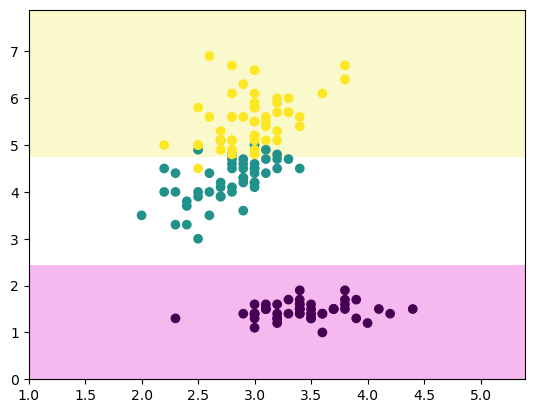

In [9]:
decision_boundary_plot(x,y,clf)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 4.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.154\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]')]

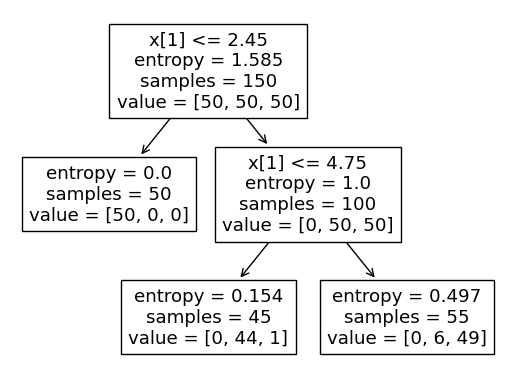

In [10]:
from sklearn.tree import plot_tree
plot_tree(clf)

## 寻找最优划分条件

In [11]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [12]:
def calc_entropy(y):
    counter=Counter(y)
    sum_ent=0
    for i in counter:
        p=counter[i]/len(y)
        sum_ent+=(-p*np.log2(p))
    return sum_ent

In [13]:
calc_entropy(y)

1.584962500721156

In [14]:
def split_dataset(x,y,dim,value):
    index_left=(x[:,dim]<=value)
    index_right=(x[:,dim]>value)
    return x[index_left],y[index_left],x[index_right],y[index_right]

In [22]:
def find_best_split(x,y):
    best_dim=-1
    best_value=-1
    best_entropy=np.inf
    best_entropy_left,best_entropy_right=-1,-1
    for dim in range(x.shape[1]):#列数
        sorted_index=np.argsort(x[:,dim])
        for i in range(x.shape[0]-1):#行数在这段代码中，循环 for i in range(x.shape[0]-1): 是用来遍历数据集中的每一行，即每个样本。为什么要减1呢？这是因为在每次循环中，我们会比较当前行和下一行的特征值，而最后一行没有下一行了，所以在这种情况下，我们不需要再进行一次比较，因此循环的结束位置应该是 x.shape[0] - 1。如果 x.shape[0] 为0，即数据集中没有样本，那么这个循环根本不会执行，因为没有数据可以遍历。如果 x.shape[0] 为1，即数据集只有一个样本，那么这个循环也不会执行，因为在这种情况下，无法进行下一行和当前行的比较。
            value_left,value_right=x[sorted_index[i],dim],x[sorted_index[i+1],dim]
            if value_left!=value_right:
                value=(value_left+value_right)/2
                x_left,y_left,x_right,y_right=split_dataset(x,y,dim,value)
                entropy_left,entropy_right=calc_entropy(y_left),calc_entropy(y_right)
                entropy=(len(x_left)*entropy_left+len(x_right)*entropy_right)/x.shape[0]
                if entropy<best_entropy:
                    best_dim=-dim
                    best_value=value
                    best_entropy=entropy
                    best_entropy_left,best_entropy_right=entropy_left,entropy_right
    return best_dim,best_value,best_entropy,best_entropy_left,best_entropy_right

In [19]:
find_best_split(x,y)

(-1, 2.45, 0.6666666666666666, 0.0, 1.0)

In [20]:
x_left,y_left,x_right,y_right=split_dataset(x,y,1,2.45)

In [21]:
find_best_split(x_right,y_right)

(-1, 4.75, 0.34262624992678425, 0.15374218032876188, 0.4971677614160753)